### [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model "sklearn.linear_model").Ridge
* _class_ sklearn.linear_model.Ridge(_alpha=1.0_, _*_, _fit_intercept=True_, _copy_X=True_, _max_iter=None_, _tol=0.0001_, _solver='auto'_, _positive=False_, _random_state=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_ridge.py#L921)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "Permalink to this definition")

**Parameters** :

**alpha** : {float, ndarray of shape (n_targets,)}, default=1.0

Constant that multiplies the L2 term, controlling regularization strength.  `alpha`  must be a non-negative float i.e. in  `[0,  inf)`.

When  `alpha  =  0`, the objective is equivalent to ordinary least squares, solved by the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object. For numerical reasons, using  `alpha  =  0`  with the  `Ridge`  object is not advised. Instead, you should use the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object.

If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

**fit_intercept** : bool, default=True

Whether to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e.  `X`  and  `y`  are expected to be centered).

**copy_X** : bool, default=True

If True, X will be copied; else, it may be overwritten.

**max_iter** : int, default=None

Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. For ‘sag’ solver, the default value is 1000. For ‘lbfgs’ solver, the default value is 15000.

**tol** : float, default=1e-4

Precision of the solution. Note that  `tol`  has no effect for solvers ‘svd’ and ‘cholesky’.

Changed in version 1.2: Default value changed from 1e-3 to 1e-4 for consistency with other linear models.

### [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model "sklearn.linear_model").Lasso
* _class_ sklearn.linear_model.Lasso(_alpha=1.0_, _*_, _fit_intercept=True_, _precompute=False_, _copy_X=True_, _max_iter=1000_, _tol=0.0001_, _warm_start=False_, _positive=False_, _random_state=None_, _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_coordinate_descent.py#L1081)[¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso "Permalink to this definition")

**Parameters** :

**alpha** : float, default=1.0

Constant that multiplies the L1 term, controlling regularization strength.  `alpha`  must be a non-negative float i.e. in  `[0,  inf)`.

When  `alpha  =  0`, the objective is equivalent to ordinary least squares, solved by the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object. For numerical reasons, using  `alpha  =  0`  with the  `Lasso`  object is not advised. Instead, you should use the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object.

**fit_intercept** : bool, default=True

Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**precompute** : bool or array-like of shape (n_features, n_features), default=False

Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always  `False`  to preserve sparsity.

**copy_X** : bool, default=True

If  `True`, X will be copied; else, it may be overwritten.

**max_iter** : int, default=1000

The maximum number of iterations.

**tol** : float, default=1e-4

The tolerance for the optimization: if the updates are smaller than  `tol`, the optimization code checks the dual gap for optimality and continues until it is smaller than  `tol`, see Notes below.

**warm_start** : bool, default=False

When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See  [the Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start).

**positive** : bool, default=False

When set to  `True`, forces the coefficients to be positive.

**random_state** : int, RandomState instance, default=None

The seed of the pseudo random number generator that selects a random feature to update. Used when  `selection`  == ‘random’. Pass an int for reproducible output across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**selection** : {‘cyclic’, ‘random’}, default=’cyclic’

If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# boston 데이터셋 로드
boston = pd.read_csv('./datasets/Boston.csv')
boston.feature_names = boston.columns

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston, columns=boston.feature_names).drop(columns='medv', axis=1)

# boston dataset의 target array는 주택 가격, PRICE 컬럼으로 DataFrame에 존재
bostonDF['PRICE'] = boston['medv']

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 릿지 클래스
ridge = Ridge(alpha=10)
lr = LinearRegression()
lasso = Lasso(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 folds 의 개별 Negative MSE scores:  [-14.604 -24.249 -28.83  -74.663 -27.7  ]
5 folds 의 개별 RMSE scores : [3.821 4.924 5.369 8.641 5.263]
5 folds 의 평균 RMSE : 5.604


C:\Users\USER\AppData\Local\Temp\ipykernel_11120\371462597.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  boston.feature_names = boston.columns


In [16]:
## LinearRegression
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-14.753 -25.072 -32.737 -80.584 -32.162]
5 folds 의 개별 RMSE scores : [3.841 5.007 5.722 8.977 5.671]
5 folds 의 평균 RMSE : 5.844


In [30]:
## 라쏘
neg_mse_scores = cross_val_score(lasso, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [ -46.578  -83.808 -117.847  -91.76   -36.418]
5 folds 의 개별 RMSE scores : [ 6.825  9.155 10.856  9.579  6.035]
5 folds 의 평균 RMSE : 8.490


In [31]:
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_ridge_score = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_ridge_score))
    print(avg_rmse)

5.843570031453095
5.806855643266924
5.693297283231801
5.603813086132244
5.499629005415296


In [34]:
alphas = [0,0.5,1,10,100]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    neg_mse_ridge_score = cross_val_score(lasso, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_ridge_score))
    print(avg_rmse)

5.843570031453093
5.867702208665685
6.081583924885157
7.183401171075301
8.489818561148812


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.913e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using o

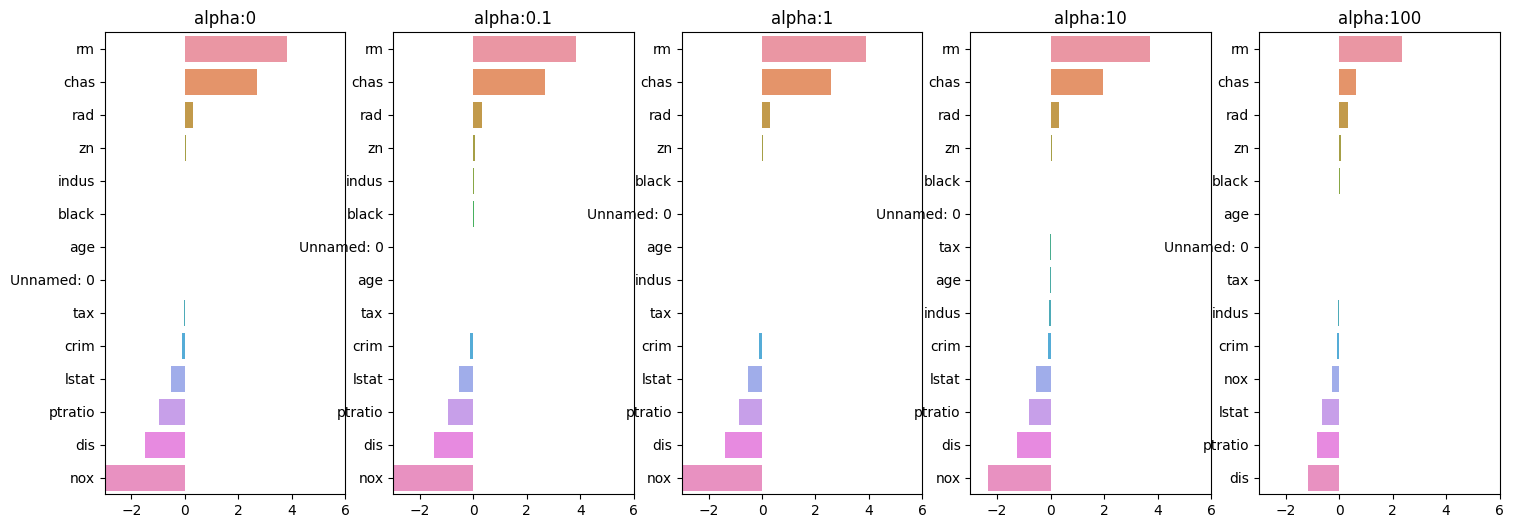

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    # alpha에 따른 피쳐별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [28]:
coeff

rm            2.348374
chas          0.642700
rad           0.332157
zn            0.055823
black         0.009416
age          -0.000734
Unnamed: 0   -0.002172
tax          -0.015208
indus        -0.052455
crim         -0.102900
nox          -0.259752
lstat        -0.662552
ptratio      -0.828259
dis          -1.169480
dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_11120\41945742.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(x_data, y_target)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.523e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in

rm             3.839225
chas           2.705245
rad            0.324925
zn             0.048031
indus          0.019932
black          0.009357
age           -0.001938
Unnamed: 0    -0.002526
tax           -0.011598
crim          -0.108762
lstat         -0.526184
ptratio       -0.947985
dis           -1.493304
nox          -17.541602
dtype: float64
rm            2.514752
rad           0.289568
zn            0.050519
black         0.009491
age           0.002135
chas          0.000000
nox          -0.000000
Unnamed: 0   -0.001545
indus        -0.004927
tax          -0.014993
crim         -0.083865
lstat        -0.657086
ptratio      -0.757616
dis          -0.949550
dtype: float64
rm            0.951835
rad           0.266066
zn            0.049306
age           0.020707
black         0.008250
indus        -0.000000
chas          0.000000
nox          -0.000000
Unnamed: 0   -0.000216
tax          -0.015155
crim         -0.063555
dis          -0.670667
ptratio      -0.722847
lstat        

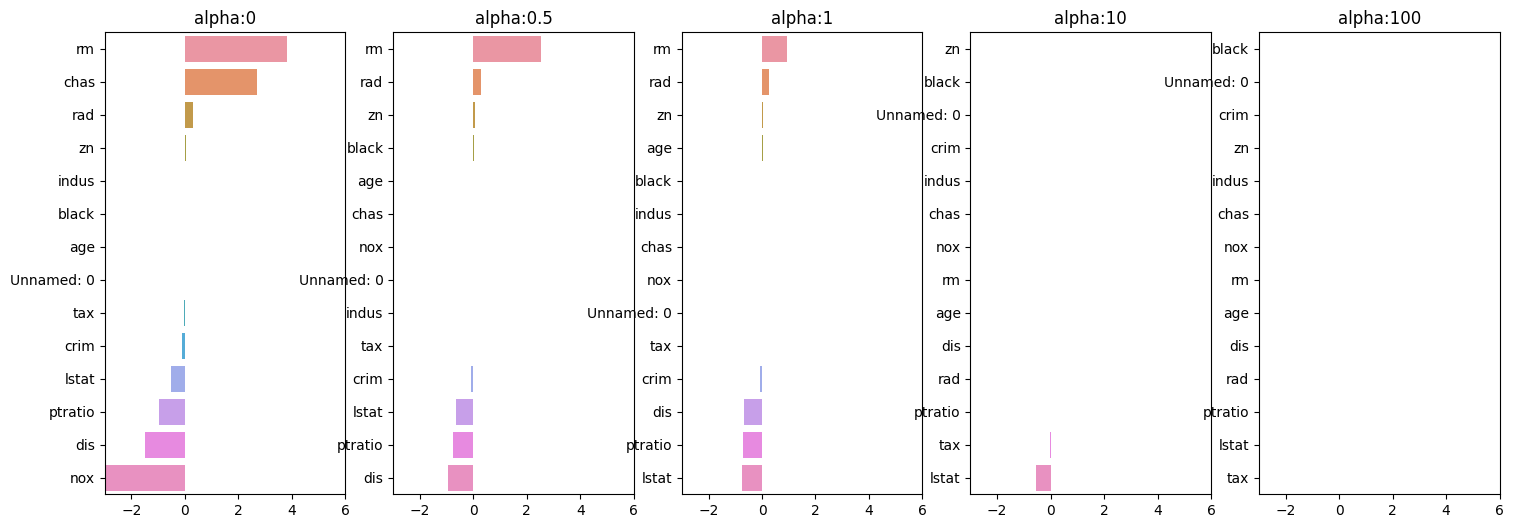

In [35]:
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_data, y_target)
    # alpha에 따른 피쳐별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=lasso.coef_, index=x_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False) # 회귀 계수 값이 높은 순으로 정렬
    print(coeff)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

### [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model "sklearn.linear_model").ElasticNet
* _class_ sklearn.linear_model.ElasticNet(_alpha=1.0_,  _*_,  _l1_ratio=0.5_,  _fit_intercept=True_,  _precompute=False_,  _max_iter=1000_,  _copy_X=True_,  _tol=0.0001_,  _warm_start=False_,  _positive=False_,  _random_state=None_,  _selection='cyclic'_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/7db5b6a98/sklearn/linear_model/_coordinate_descent.py#L663)[](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet "Permalink to this definition")

**Parameters** :

**alpha** : float, default=1.0

Constant that multiplies the penalty terms. Defaults to 1.0. See the notes for the exact mathematical meaning of this parameter.  `alpha  =  0`  is equivalent to an ordinary least square, solved by the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object. For numerical reasons, using  `alpha  =  0`  with the  `Lasso`  object is not advised. Given this, you should use the  [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression "sklearn.linear_model.LinearRegression")  object.

**l1_ratio** : float, default=0.5

The ElasticNet mixing parameter, with  `0  <=  l1_ratio  <=  1`. For  `l1_ratio  =  0`  the penalty is an L2 penalty.  `For  l1_ratio  =  1`  it is an L1 penalty. For  `0  <  l1_ratio  <  1`, the penalty is a combination of L1 and L2.

**fit_intercept** : bool, default=True

Whether the intercept should be estimated or not. If  `False`, the data is assumed to be already centered.

**precompute** : bool or array-like of shape (n_features, n_features), default=False

Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always  `False`  to preserve sparsity.

**max_iter** : int, default=1000

The maximum number of iterations.

**copy_X** : bool, default=True

If  `True`, X will be copied; else, it may be overwritten.

**tol** : float, default=1e-4

The tolerance for the optimization: if the updates are smaller than  `tol`, the optimization code checks the dual gap for optimality and continues until it is smaller than  `tol`, see Notes below.

**warm_start** : bool, default=False

When set to  `True`, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See  [the Glossary](https://scikit-learn.org/stable/glossary.html#term-warm_start).

**positive** : bool, default=False

When set to  `True`, forces the coefficients to be positive.

**random_state** : int, RandomState instance, default=None

The seed of the pseudo random number generator that selects a random feature to update. Used when  `selection`  == ‘random’. Pass an int for reproducible output across multiple function calls. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**selection** : {‘cyclic’, ‘random’}, default=’cyclic’

If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

In [36]:
from sklearn.linear_model import ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(x_data, y_target)
        # alpha에 따른 피쳐별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
        coeff = pd.Series(data=model.coef_, index=x_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [39]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07 일 때 5폴드 세트의 평균 RMSE: 5.714
alpha 0.1 일 때 5폴드 세트의 평균 RMSE: 5.731
alpha 0.5 일 때 5폴드 세트의 평균 RMSE: 5.868
alpha 1 일 때 5폴드 세트의 평균 RMSE: 6.082
alpha 3 일 때 5폴드 세트의 평균 RMSE: 6.783


In [41]:
x_data = x_data[['rm', 'chas', 'dis']]
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 3))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [  -9.952  -37.426  -47.004 -104.433  -68.96 ]
5 folds 의 개별 RMSE scores : [ 3.155  6.118  6.856 10.219  8.304]
5 folds 의 평균 RMSE : 6.930
